In [1]:
# Manual Label Encoding
def label_encoder_target(data):
    data = data.map({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})
    return data


def encoder(data, label_col, label_col2, label_col3,label_col4, onehot_cols):
    if label_col in data.columns:
        data[label_col] = data[label_col].map({'Insufficient_Weight':0, 'Normal_Weight':1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I':4, 'Obesity_Type_II':5, 'Obesity_Type_III':6})
    for col in onehot_cols:
        if col != 'Gender':
            data[col] = data[col].map({'yes':1, 'no':0})
        else:
            data[col] = data[col].map({'Female':0, 'Male':1})
    
    data[label_col2] = data[label_col2].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    data[label_col3] = data[label_col3].map({'Bike':0, 'Walking':1, 'Public_Transportation':2, 'Motorbike':3, 'Automobile':4})
    data[label_col4] = data[label_col4].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    return data

def decoder(data, label_col, label_col2, label_col3, label_col4, onehot_cols):
    # Original mapping dictionary
    reverse_mapping = {'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
    # Reverse the mapping
    reverse_mapping = {v: k for k, v in reverse_mapping.items()}
    # Use the reversed mapping to decode
    data[label_col] = data[label_col].map(reverse_mapping)

    # Reverse mapping for onehot_cols
    for col in onehot_cols:
        if col != 'Gender':
            data[col] = data[col].map({1: 'yes', 0: 'no'})
        else:
            data[col] = data[col].map({0: 'Female', 1: 'Male'})

    # Reverse mapping for label_col2
    data[label_col2] = data[label_col2].map({0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'})
    # Reverse mapping for label_col3
    data[label_col3] = data[label_col3].map({0: 'Bike', 1: 'Walking', 2: 'Public_Transportation', 3: 'Motorbike', 4: 'Automobile'})
    # Reverse mapping for label_col4
    data[label_col4] = data[label_col4].map({0: 'no', 1: 'Sometimes', 2: 'Frequently', 3: 'Always'})

    return data



# print(A.columns)

import numpy as np

def gen_features(x):
    x_copy = x.copy()
    x_copy['AgeCat'] = np.round(x_copy.Age*50).astype(np.uint32)
    x_copy['BMI'] = x_copy['Weight']/x_copy['Height']
    return x_copy

def brackets(x):
    # age brackets of 5 years, new column Age_bracket
    age_bracket = x['Age']//5
    x['Age_bracket'] = age_bracket
    # weight brackets of 2.5kg, new column Weight_bracket
    weight_bracket = x['Weight']//2.5
    x['Weight_bracket'] = weight_bracket

    # add new column BMI 
    x['BMI'] = x['Height']/x['Weight']

    # remove age and weight columns
    x = x.drop(['Age', 'Weight'], axis=1)
    
    return x


In [2]:
# import pandas as pd
# import numpy as np
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# #current working directory
# import os
# import datetime
# os.getcwd()

# onehot = ['Gender' ,'family_history_with_overweight','FAVC','SMOKE','SCC']



# # Load the labeled training data (A) and test data (B)
# A = pd.read_csv('train.csv')  
# B = pd.read_csv('test.csv')   
# S = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# # Perform encoding if needed
# # Assuming encoder and onehot functions are defined or imported properly
# A = encoder(A, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
# C = encoder(S, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
# B = encoder(B, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)

# # Combine A and C to A 
# A = pd.concat([A, C], axis=0)

# # Remove duplicates
# A = A.drop_duplicates()

# # # split A into A and A_test
# # A, A_test = train_test_split(A, test_size=0.2, random_state=42)


# # isolation forrest on A
# from sklearn.ensemble import IsolationForest
# clf = IsolationForest(random_state=42,contamination=0.01)
# clf.fit(A.drop(columns=['NObeyesdad']))
# y_pred_outliers = clf.predict(A.drop(columns=['NObeyesdad']))
# A['outliers'] = y_pred_outliers
# A = A[A['outliers'] == 1]
# A = A.drop(columns=['outliers'])





# # Define scale_cols before scaling
# scale_cols = ['Age','Height', 'Weight','FCVC','NCP','CH2O','FAF','TUE']

# # Min-max scaling 
# for c in scale_cols:  
#     A[c] = A[c].pow(0.5)
#     B[c] = B[c].pow(0.5) 
#     #C[c] = C[c].pow(0.5)

# # Split the labeled training data into features (X) and target (y)
# X_train = A.drop(columns=['NObeyesdad'])  
# y_train = A['NObeyesdad']  

# # Define XGBClassifier with parameters # optuna  with 10 iterations
# # parameters = {'max_depth': 6, 'learning_rate': 0.03617694379652588, 'n_estimators': 629, 'subsample': 0.8204774268264704, 'colsample_bytree': 0.8750737854215174}


# # hyper parameter tuning with optuna
# def objective(trial):
#     # Define the hyperparameter search space
#     max_depth = trial.suggest_int('max_depth', 3, 10)
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.1)
#     n_estimators = trial.suggest_int('n_estimators', 100, 1000)
#     subsample = trial.suggest_float('subsample', 0.5, 1.0)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

#     # Create the model
#     model = XGBClassifier(
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         n_estimators=n_estimators,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree
#     )

#     # Fit the model on the training set
#     model.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_test_pred = model.predict(A_test.drop(columns=['NObeyesdad']))

#     # Calculate accuracy
#     accuracy = accuracy_score(A_test['NObeyesdad'], y_test_pred)

#     return accuracy



# model = XGBClassifier(**parameters)

# # Fit the model on the entire dataset
# model.fit(X_train, y_train)

# # Make predictions on the test set
# # y_test_pred = model.predict(A_test.drop(columns=['NObeyesdad']))
# y_test_pred = model.predict(B)


# # accuracy

# #accuracy = accuracy_score(A_test['NObeyesdad'], y_test_pred)
# # # Create submission DataFrame
# submission = pd.DataFrame({'id': B['id'], 'NObeyesdad': y_test_pred})

# # Decode NObeyesdad
# reverse_mapping = {
#     0: 'Insufficient_Weight',
#     1: 'Normal_Weight',
#     2: 'Overweight_Level_I',
#     3: 'Overweight_Level_II',
#     4: 'Obesity_Type_I',
#     5: 'Obesity_Type_II',
#     6: 'Obesity_Type_III'
# }
# submission['NObeyesdad'] = submission['NObeyesdad'].map(reverse_mapping)

# # Save submission to CSV
# timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M")
# submission.to_csv(f'submission_{timestamp}.csv', index=False)


# # accuracy

In [7]:
submission

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [6]:
import pandas as pd
import numpy as np
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import os
import datetime

# current working directory
os.getcwd()

onehot = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Load the labeled training data (A) and test data (B)
A = pd.read_csv('train.csv')
B = pd.read_csv('test.csv')
S = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Perform encoding if needed
# Assuming encoder and onehot functions are defined or imported properly
A = encoder(A, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
C = encoder(S, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
B = encoder(B, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)

# Combine A and C to A
A = pd.concat([A, C], axis=0)

# Remove duplicates
A = A.drop_duplicates()

A = brackets(A)
B = brackets(B)


# def gen_features(x):
#     x_copy = x.copy()
#     x_copy['AgeCat'] = np.round(x_copy.Age*50).astype(np.uint32)
#     x_copy['BMI'] = x_copy['Weight']/x_copy['Height']
#     return x_copy

# A = gen_features(A)
# B = gen_features(B)

# weight class


Temp = A.copy()

# split A into A_train and A_valid
A_train, A_valid = train_test_split(A, test_size=0.2, random_state=42)

# Define scale_cols before scaling
scale_cols = ['BMI', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] # 'Age'  'Weight'

# Min-max scaling
for c in scale_cols:
    A_train[c] = A_train[c].pow(0.5)
    A_valid[c] = A_valid[c].pow(0.5)
    A[c] = A[c].pow(0.5)
    B[c] = B[c].pow(0.5)

# remove TUE, SMOKE, NCP
# A_train = A_train.drop(columns=['TUE', 'SMOKE', 'NCP'])
# A_valid = A_valid.drop(columns=['TUE', 'SMOKE', 'NCP'])
# # A = A.drop(columns=['TUE', 'SMOKE', 'NCP'])
# # B = B.drop(columns=['TUE', 'SMOKE', 'NCP'])


# Split the labeled training data into features (X_train) and target (y_train)
X_train_val = A_train.drop(columns=['NObeyesdad','id'])
y_train_val = A_train['NObeyesdad']
X = A.drop(columns=['NObeyesdad','id'])
y = A['NObeyesdad']

# Define hyperparameter tuning objective function
def objective(trial):
    # Define the hyperparameter search space
    max_depth = trial.suggest_int('max_depth', 5, 15)  # Wider range for max_depth
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)  # Narrower range for learning_rate
    n_estimators = trial.suggest_int('n_estimators', 200, 1500)  # Wider range for n_estimators
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Create the model
    model = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='binary:logistic'
    )

    # Fit the model on the training set
    model.fit(X_train_val, y_train_val)

    # Make predictions on the validation set
    y_valid_pred = model.predict(A_valid.drop(columns=['NObeyesdad', 'id']))

    # Calculate accuracy on the validation set
    accuracy = accuracy_score(A_valid['NObeyesdad'], y_valid_pred)

    # You may return any metric you want, but Optuna tries to minimize the returned value.
    # Since we want to maximize accuracy, we return negative accuracy
    return accuracy


# Perform hyperparameter tuning with Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Get the best parameters
best_params = study.best_params

# Create the model with the best parameters
best_model = XGBClassifier(**best_params)

# Fit the model on the training set
best_model.fit(X_train_val, y_train_val)

# accuracy on validation set
y_valid_pred = best_model.predict(A_valid.drop(columns=['NObeyesdad', 'id']))
accuracy = accuracy_score(A_valid['NObeyesdad'], y_valid_pred)
print(f'Accuracy on validation set: {accuracy:.4f}')

# Make predictions on the test set
y_test = best_model.predict(B.drop(columns=['id']))

# Create submission DataFrame
submission = pd.DataFrame({'id': B['id'], 'NObeyesdad': y_test})

# Decode NObeyesdad
reverse_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}
submission['NObeyesdad'] = submission['NObeyesdad'].map(reverse_mapping)

# Save submission to CSV
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M")
submission.to_csv(f'submission_{timestamp}.csv', index=False)


[I 2024-02-23 13:53:56,931] A new study created in memory with name: no-name-77133ce4-9693-465f-bd7c-70415144e9f6
[I 2024-02-23 13:54:55,049] Trial 0 finished with value: 0.912015758371635 and parameters: {'max_depth': 9, 'learning_rate': 0.012352287684578536, 'n_estimators': 793, 'subsample': 0.9615720326686903, 'colsample_bytree': 0.5366219979299214}. Best is trial 0 with value: 0.912015758371635.
[I 2024-02-23 13:55:33,342] Trial 1 finished with value: 0.9133289560078792 and parameters: {'max_depth': 5, 'learning_rate': 0.024229867554001056, 'n_estimators': 965, 'subsample': 0.5189120702546337, 'colsample_bytree': 0.5455698902854311}. Best is trial 1 with value: 0.9133289560078792.
[I 2024-02-23 13:55:52,334] Trial 2 finished with value: 0.908513898008317 and parameters: {'max_depth': 5, 'learning_rate': 0.01793683512285669, 'n_estimators': 455, 'subsample': 0.9492031954010285, 'colsample_bytree': 0.5156729395038696}. Best is trial 1 with value: 0.9133289560078792.
[I 2024-02-23 13:

Accuracy on validation set: 0.9133


multicalss


In [ ]:
# one vs rest multiclass calssification
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.svm import SVC
# from sklearn.preprocessing import LabelBinarizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Split the labeled training data into features (X_train) and target (y_train)



Stacking Model


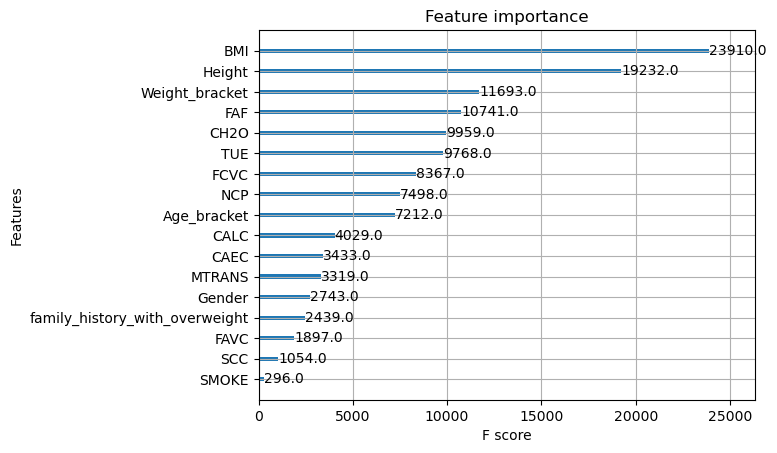

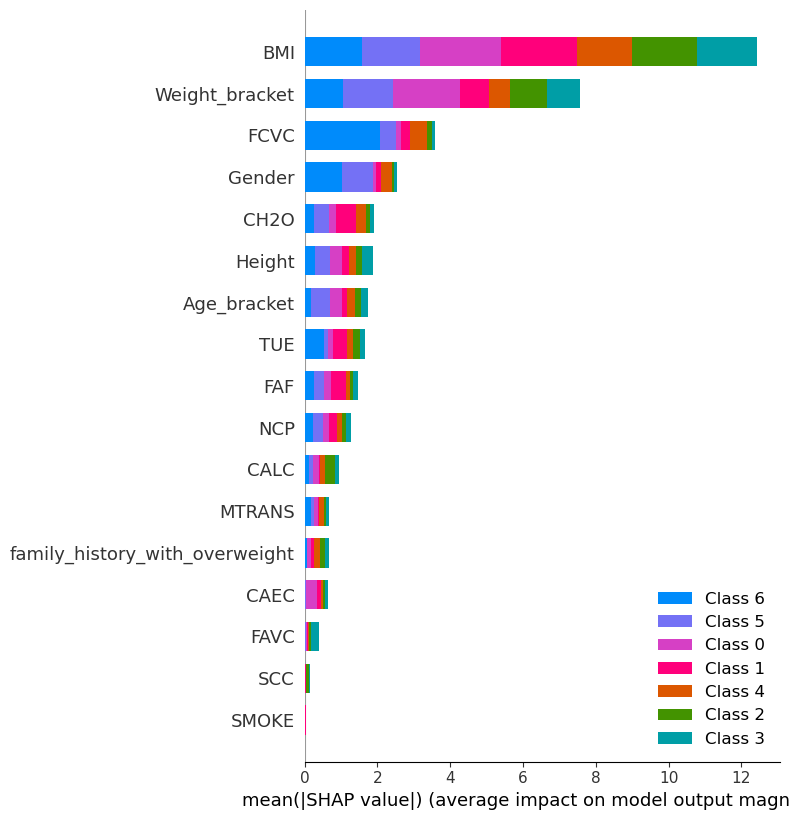

In [8]:
# feature importancs of model
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importances
plot_importance(best_model)
plt.show()


#importance by each class
import shap
shap.initjs()
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)





In [ ]:
# install  vecstack


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from vecstack import StackingTransformer
from sklearn.metrics import accuracy_score
import datetime

# Load the labeled training data (train.csv) and test data (test.csv)
A = pd.read_csv('train.csv')
B = pd.read_csv('test.csv')
S = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')


# Perform encoding if needed
A = encoder(A, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
C = encoder(S, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
B = encoder(B, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)

#Combine A and C to A
A = pd.concat([A, C], axis=0)

#Remove duplicates
A = A.drop_duplicates()

# A = brackets(A)
# B = brackets(B)

# Split A into A_train and A_valid
A_train, A_valid = train_test_split(A, test_size=0.2, random_state=42)

# Define scale_cols before scaling
scale_cols = ['Age', 'Weight','Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] # 'Age'  'Weight'

# Min-max scaling
for c in scale_cols:
    A_train[c] = A_train[c].pow(0.7)
    A_valid[c] = A_valid[c].pow(0.7)
    A[c] = A[c].pow(0.7)
    B[c] = B[c].pow(0.7)

# Split the labeled training data into features (X_train) and target (y_train)
X_train_val = A_train.drop(columns=['NObeyesdad','id'])
y_train_val = A_train['NObeyesdad']
X = A.drop(columns=['NObeyesdad','id'])
y = A['NObeyesdad']

# Define base models
models = [
    ('rf', RandomForestClassifier(n_estimators=552, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=552, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=552, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=552, random_state=42))
]

# Define the stacking transformer
stack = StackingTransformer(models, regression=False, metric=accuracy_score, n_folds=5, stratified=True, shuffle=True, random_state=42, verbose=2)

# Fit the stacking transformer on the training data
stack = stack.fit(X_train_val, y_train_val)

# Transform the validation data
S_train = stack.transform(X_train_val)
S_valid = stack.transform(A_valid.drop(columns=['NObeyesdad', 'id']))

# Define the meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression()

# Fit the meta-model on the transformed training data
meta_model.fit(S_train, y_train_val)

# Make predictions on the transformed validation data
pred_valid = meta_model.predict(S_valid)

# Calculate accuracy on the validation set
accuracy = accuracy_score(A_valid['NObeyesdad'], pred_valid)
print(f'Accuracy on validation set: {accuracy:.4f}')

# Transform the test data
S_test = stack.transform(B.drop(columns=['id']))

# Make predictions on the test data
final_predictions = meta_model.predict(S_test)

# Create submission DataFrame
submission = pd.DataFrame({'id': B['id'], 'NObeyesdad': final_predictions})

# Decode NObeyesdad
reverse_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}
submission['NObeyesdad'] = submission['NObeyesdad'].map(reverse_mapping)

# Save submission to CSV
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M")
submission.to_csv(f'submission_{timestamp}.csv', index=False)


task:         [classification]
n_classes:    [7]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [4]

estimator  0: [rf: RandomForestClassifier]
    fold  0:  [0.90043764]
    fold  1:  [0.90478796]
    fold  2:  [0.90725034]
    fold  3:  [0.91080711]
    fold  4:  [0.90314637]
    ----
    MEAN:     [0.90528589] + [0.00354045]

estimator  1: [gb: GradientBoostingClassifier]
    fold  0:  [0.90481400]
    fold  1:  [0.90889193]
    fold  2:  [0.90943912]
    fold  3:  [0.91381669]
    fold  4:  [0.91025992]
    ----
    MEAN:     [0.90944433] + [0.00288194]

estimator  2: [lgbm: LGBMClassifier]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 14620, number of used features: 16
[LightGBM] [Info] Start train

/Users/arham/anaconda3/envs/DataScience/lib/python3.10/site-packages/vecstack/coresk.py:776: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, estimator_counter] = st.mode(S_test_temp, axis=1)[0].ravel()


    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  2: [lgbm: LGBMClassifier]


/Users/arham/anaconda3/envs/DataScience/lib/python3.10/site-packages/vecstack/coresk.py:776: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, estimator_counter] = st.mode(S_test_temp, axis=1)[0].ravel()


    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  3: [xgb: XGBClassifier]
    model from fold  0: done


/Users/arham/anaconda3/envs/DataScience/lib/python3.10/site-packages/vecstack/coresk.py:776: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, estimator_counter] = st.mode(S_test_temp, axis=1)[0].ravel()


    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE



/Users/arham/anaconda3/envs/DataScience/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on validation set: 0.9107
Transforming...

estimator  0: [rf: RandomForestClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  1: [gb: GradientBoostingClassifier]


/Users/arham/anaconda3/envs/DataScience/lib/python3.10/site-packages/vecstack/coresk.py:776: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, estimator_counter] = st.mode(S_test_temp, axis=1)[0].ravel()


    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE

estimator  2: [lgbm: LGBMClassifier]


/Users/arham/anaconda3/envs/DataScience/lib/python3.10/site-packages/vecstack/coresk.py:776: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, estimator_counter] = st.mode(S_test_temp, axis=1)[0].ravel()


    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----


/Users/arham/anaconda3/envs/DataScience/lib/python3.10/site-packages/vecstack/coresk.py:776: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, estimator_counter] = st.mode(S_test_temp, axis=1)[0].ravel()


    DONE

estimator  3: [xgb: XGBClassifier]
    model from fold  0: done
    model from fold  1: done
    model from fold  2: done
    model from fold  3: done
    model from fold  4: done
    ----
    DONE



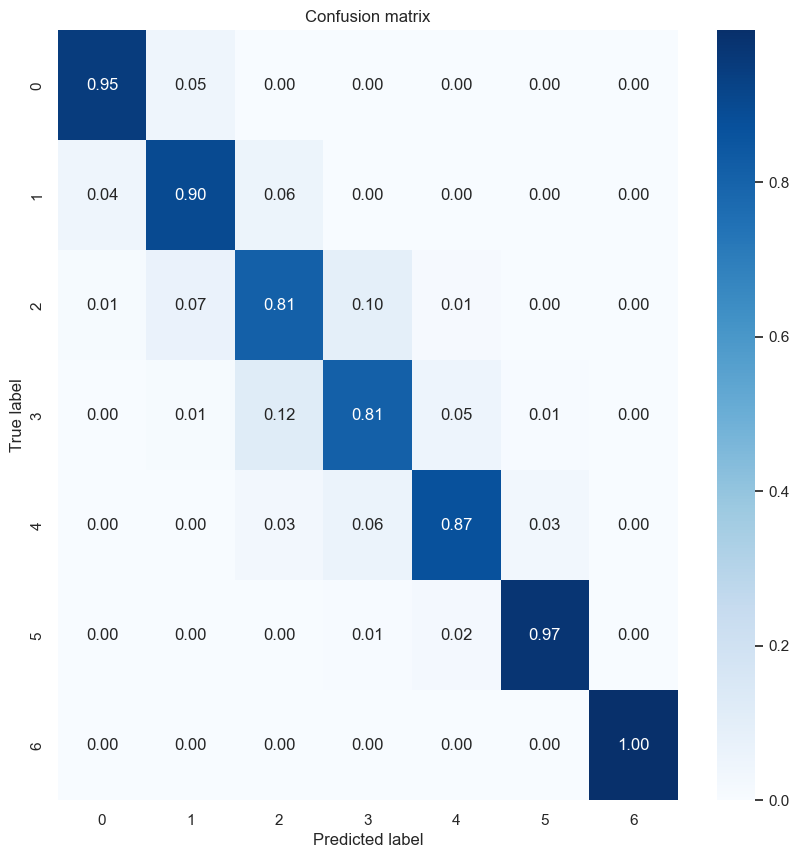

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       574
           1       0.89      0.90      0.90       677
           2       0.78      0.81      0.80       525
           3       0.82      0.81      0.81       536
           4       0.92      0.87      0.90       682
           5       0.96      0.97      0.97       697
           6       1.00      1.00      1.00       878

    accuracy                           0.91      4569
   macro avg       0.90      0.90      0.90      4569
weighted avg       0.91      0.91      0.91      4569



In [68]:
# accuracy of stacking
accuracy

# confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(A_valid['NObeyesdad'], pred_valid)

# add name of classes to confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(A_valid['NObeyesdad'], pred_valid)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

#print confusion matrix as table
from sklearn.metrics import classification_report
print(classification_report(A_valid['NObeyesdad'], pred_valid))


In [69]:
# create table of predicted label and true label
df = pd.DataFrame({'True': A_valid['NObeyesdad'], 'Predicted': pred_valid})
df['True'] = df['True'].map(reverse_mapping)
df['Predicted'] = df['Predicted'].map(reverse_mapping)


df

# unique combinations and count
unique_comb = df.groupby(['True', 'Predicted']).size().reset_index(name='Count')
unique_comb


# make matrix, row as true and column as predicted 

matrix = pd.crosstab(df['True'], df['Predicted'])
matrix


Predicted,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
True,,,,,,,
Insufficient_Weight,543,29,0,0,0,1,1
Normal_Weight,30,608,0,0,0,39,0
Obesity_Type_I,1,2,594,23,1,19,42
Obesity_Type_II,0,0,14,679,0,0,4
Obesity_Type_III,0,1,0,1,875,0,1
Overweight_Level_I,5,35,7,1,0,427,50
Overweight_Level_II,0,6,29,3,0,63,435


In [63]:


# 

,True,Predicted
8323,6,6
11037,2,2
1912,6,6
9851,3,3
13662,6,6
...,...,...
19534,0,0
11134,3,3
1030,3,3
17678,5,5


In [56]:
print(confusion_matrix)

<function confusion_matrix at 0x163604f70>


In [54]:
# profile of NObeyesdad by BMI



In [18]:
import pandas as pd
import numpy as np
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import os
import datetime

# current working directory
os.getcwd()

onehot = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Load the labeled training data (A) and test data (B)
A = pd.read_csv('train.csv')
B = pd.read_csv('test.csv')
S = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Perform encoding if needed
# Assuming encoder and onehot functions are defined or imported properly
A = encoder(A, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
C = encoder(S, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
B = encoder(B, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)

# Combine A and C to A
A = pd.concat([A, C], axis=0)

# Remove duplicates
A = A.drop_duplicates()

Temp = A.copy()

# split A into A_train and A_valid
A_train, A_valid = train_test_split(A, test_size=0.2, random_state=42)

# # Define scale_cols before scaling
# scale_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# # Min-max scaling
# for c in scale_cols:
#     A_train[c] = A_train[c].pow(0.5)
#     A_valid[c] = A_valid[c].pow(0.5)
#     A[c] = A[c].pow(0.5)
#     B[c] = B[c].pow(0.5)

# # Split the labeled training data into features (X_train) and target (y_train)
# X_train_val = A_train.drop(columns=['NObeyesdad','id'])
# y_train_val = A_train['NObeyesdad']
# X = A.drop(columns=['NObeyesdad','id'])
# y = A['NObeyesdad']


# lasso to remove outliers

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Define scale_cols before scaling
scale_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Min-max scaling
for c in scale_cols:
    A_train[c] = A_train[c].pow(0.5)
    A_valid[c] = A_valid[c].pow(0.5)
    A[c] = A[c].pow(0.5)
    B[c] = B[c].pow(0.5)

# Split the labeled training data into features (X_train) and target (y_train)
    

In [20]:
# feature selection for A_train
scaler = StandardScaler()
scaler.fit(A_train.drop(columns=['NObeyesdad','id']))
X_train_val = scaler.transform(A_train.drop(columns=['NObeyesdad','id']))
y_train_val = A_train['NObeyesdad']
X = scaler.transform(A.drop(columns=['NObeyesdad','id']))
y = A['NObeyesdad']

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_val, y_train_val)
mask = lasso.coef_ != 0
X_train_val = X_train_val[:, mask]
X = X[:, mask]



In [23]:
#Correlation matrix of A with Id removed
corr_matrix = A.drop(columns=['id']).corr().abs()

In [24]:
corr_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.066059,0.623815,0.145350,0.097399,0.025739,0.292567,0.048310,0.048791,0.061051,0.068566,0.065596,0.270295,0.000868,0.034773,0.128901,0.064592
Age,0.066059,1.000000,0.007912,0.323350,0.271434,0.063008,0.050041,0.034119,0.154683,0.062542,0.008390,0.116700,0.206534,0.309497,0.078098,0.582480,0.378723
Height,0.623815,0.007912,1.000000,0.422989,0.230264,0.123195,0.062236,0.202827,0.068753,0.066666,0.198331,0.101274,0.340084,0.080109,0.093099,0.044678,0.149133
Weight,0.145350,0.323350,0.422989,1.000000,0.532358,0.233830,0.220194,0.112519,0.345872,0.036892,0.308577,0.193019,0.060613,0.004132,0.207903,0.028958,0.926356
family_history_with_overweight,0.097399,0.271434,0.230264,0.532358,1.000000,0.158143,0.051104,0.060255,0.204585,0.018336,0.194248,0.169244,0.082596,0.038598,0.004992,0.115245,0.520224
FAVC,0.025739,0.063008,0.123195,0.233830,0.158143,1.000000,0.002934,0.014580,0.118833,0.021331,0.036690,0.121892,0.053788,0.073653,0.081825,0.043230,0.218961
FCVC,0.292567,0.050041,0.062236,0.220194,0.051104,0.002934,1.000000,0.105719,0.009848,0.008465,0.091382,0.025387,0.085358,0.073921,0.115046,0.079226,0.264814
NCP,0.048310,0.034119,0.202827,0.112519,0.060255,0.014580,0.105719,1.000000,0.073017,0.005321,0.088065,0.001920,0.073534,0.106536,0.102132,0.002931,0.051990
CAEC,0.048791,0.154683,0.068753,0.345872,0.204585,0.118833,0.009848,0.073017,1.000000,0.023767,0.131575,0.100316,0.058342,0.015130,0.063925,0.057626,0.361905
SMOKE,0.061051,0.062542,0.066666,0.036892,0.018336,0.021331,0.008465,0.005321,0.023767,1.000000,0.024886,0.021732,0.012442,0.021527,0.030120,0.017354,0.011692


In [34]:
A

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,AgeCat,BMI
0,0.0,1,4.943987,1.303840,9.037143,1,1,1.414214,1.727222,1,0,1.662400,0,0.000000,0.988166,1,2,3,1222,6.931176
1,1.0,0,4.242641,1.249000,7.549834,1,1,1.414214,1.732051,2,0,1.414214,0,1.000000,1.000000,0,4,1,900,6.044705
2,2.0,0,4.242641,1.308228,7.082779,1,1,1.371326,1.188144,1,0,1.382164,0,0.930615,1.293671,0,2,0,900,5.414025
3,3.0,0,4.577416,1.307949,11.457524,1,1,1.732051,1.732051,1,0,1.293855,0,1.211554,0.883289,1,2,6,1048,8.759918
4,4.0,1,5.625041,1.383541,9.684940,1,1,1.636968,1.404091,1,0,1.407071,0,1.402845,0.965257,1,2,3,1582,7.000110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,NaN,0,4.580048,1.307949,11.463356,1,1,1.732051,1.732051,1,0,1.314587,0,1.294708,0.951970,1,2,6,1049,8.764377
2107,NaN,0,4.688597,1.322340,11.564728,1,1,1.732051,1.732051,1,0,1.416026,0,1.158184,0.774125,1,2,6,1099,8.745652
2108,NaN,0,4.745949,1.323709,11.562411,1,1,1.732051,1.732051,1,0,1.433246,0,1.189205,0.803920,1,2,6,1126,8.734858
2109,NaN,0,4.935781,1.318882,11.547582,1,1,1.732051,1.732051,1,0,1.688887,0,1.067290,0.765529,1,2,6,1218,8.755583


In [36]:
A = pd.read_csv('train.csv')
A

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [37]:
# min, max, median of numerical columns
A.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
# define function to make age brackets and weight brackets




# One vs Rest 

In [3]:
import pandas as pd
import numpy as np
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
import os
import datetime

# current working directory
os.getcwd()

onehot = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

# Load the labeled training data (A) and test data (B)
A = pd.read_csv('train.csv')
B = pd.read_csv('test.csv')
S = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Perform encoding if needed
# Assuming encoder and onehot functions are defined or imported properly
A = encoder(A, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
C = encoder(S, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)
B = encoder(B, 'NObeyesdad', 'CAEC', 'MTRANS', 'CALC', onehot)

# Combine A and C to A
A = pd.concat([A, C], axis=0)

# Remove duplicates
A = A.drop_duplicates()

A = brackets(A)
B = brackets(B)

Temp = A.copy()

# split A into A_train and A_valid
A_train, A_valid = train_test_split(A, test_size=0.2, random_state=42)

# Define scale_cols before scaling
scale_cols = ['BMI', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] # 'Age'  'Weight'

# Min-max scaling
for c in scale_cols:
    A_train[c] = A_train[c].pow(0.5)
    A_valid[c] = A_valid[c].pow(0.5)
    A[c] = A[c].pow(0.5)
    B[c] = B[c].pow(0.5)

# Split the labeled training data into features (X_train) and target (y_train)
X_train_val = A_train.drop(columns=['NObeyesdad','id'])
y_train_val = A_train['NObeyesdad']
X = A.drop(columns=['NObeyesdad','id'])
y = A['NObeyesdad']

# Define hyperparameter tuning objective function
def objective(trial):
    # Define the hyperparameter search space
    max_depth = trial.suggest_int('max_depth', 5, 15)  # Wider range for max_depth
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)  # Narrower range for learning_rate
    n_estimators = trial.suggest_int('n_estimators', 200, 1500)  # Wider range for n_estimators
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)

    # Create the model
    model = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        objective='binary:logistic'
    )

    # Wrap the model with OneVsRestClassifier
    model = OneVsRestClassifier(model)

    # Fit the model on the training set
    model.fit(X_train_val, y_train_val)

    # Make predictions on the validation set
    y_valid_pred = model.predict(A_valid.drop(columns=['NObeyesdad', 'id']))

    # Calculate accuracy on the validation set
    accuracy = accuracy_score(A_valid['NObeyesdad'], y_valid_pred)

    # You may return any metric you want, but Optuna tries to minimize the returned value.
    # Since we want to maximize accuracy, we return negative accuracy
    return accuracy


# Perform hyperparameter tuning with Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Get the best parameters
best_params = study.best_params

# Create the model with the best parameters
best_model = XGBClassifier(**best_params)

# Wrap the model with OneVsRestClassifier
best_model = OneVsRestClassifier(best_model)

# Fit the model on the training set
best_model.fit(X_train_val, y_train_val)

# accuracy on validation set
y_valid_pred = best_model.predict(A_valid.drop(columns=['NObeyesdad', 'id']))
accuracy = accuracy_score(A_valid['NObeyesdad'], y_valid_pred)
print(f'Accuracy on validation set: {accuracy:.4f}')

# Make predictions on the test set
y_test = best_model.predict(B.drop(columns=['id']))

# Create submission DataFrame
submission = pd.DataFrame({'id': B['id'], 'NObeyesdad': y_test})

# Decode NObeyesdad
reverse_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}
submission['NObeyesdad'] = submission['NObeyesdad'].map(reverse_mapping)

# Save submission to CSV
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M")
submission.to_csv(f'submission_{timestamp}.csv', index=False)


[I 2024-02-27 23:26:49,500] A new study created in memory with name: no-name-f07aee33-ed99-41df-9601-ed689cb3addd
[I 2024-02-27 23:27:36,818] Trial 0 finished with value: 0.9098270956445612 and parameters: {'max_depth': 13, 'learning_rate': 0.037344939629057515, 'n_estimators': 587, 'subsample': 0.5328829419491319, 'colsample_bytree': 0.5170582892982292}. Best is trial 0 with value: 0.9098270956445612.
[I 2024-02-27 23:28:19,028] Trial 1 finished with value: 0.9098270956445612 and parameters: {'max_depth': 5, 'learning_rate': 0.09988871943686517, 'n_estimators': 644, 'subsample': 0.7877859358742104, 'colsample_bytree': 0.8705626034877414}. Best is trial 0 with value: 0.9098270956445612.
[I 2024-02-27 23:29:46,991] Trial 2 finished with value: 0.9080761654629022 and parameters: {'max_depth': 5, 'learning_rate': 0.08488209565723702, 'n_estimators': 1246, 'subsample': 0.7017645001494963, 'colsample_bytree': 0.9155230005749195}. Best is trial 0 with value: 0.9098270956445612.
[I 2024-02-27

Accuracy on validation set: 0.9098
